##Data Preprocessing and Exploratory data analysis on Indian Air Quality dataset

#### Data Preprocessing Steps

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
data = pd.read_csv('drive/MyDrive/Datasets/India_airquality.csv', encoding = 'ISO-8859-1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
data.shape

(435742, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

Finding the Fraction of the data missing from each attribute

In [ ]:
print((data.isna().sum()/len(data))*100)

stn_code                       33.064749
sampling_date                   0.000688
state                           0.000000
location                        0.000688
agency                         34.304933
type                            1.237659
so2                             7.951035
no2                             3.725370
rspm                            9.230692
spm                            54.478797
location_monitoring_station     6.309009
pm2_5                          97.862497
date                            0.001606
dtype: float64


As seen from the missing values present in columns: spm, pm2_5 need to be dropped as they are having 54 and 97 percent of data missing respectively,also: stn_code column is not usefull at all,and there are two date related columns in dataset, hence dropping sampling_date column.

In [ ]:
to_drop = ['stn_code','sampling_date','spm','pm2_5']
data = data.drop(to_drop, axis = 1)

Getting list of Numerical and Categorical Columns

In [ ]:
cat_cols = list(data.select_dtypes(include= 'object').columns)
num_cols = list(data.select_dtypes(exclude= 'object').columns)
print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols )

Categorical Columns:  ['state', 'location', 'agency', 'type', 'location_monitoring_station', 'date']
Numerical Columns:  ['so2', 'no2', 'rspm']


'date' column:

In [ ]:
data['date'] = pd.to_datetime(data['date'])

## Taking only year from date format
data['year'] = data['date'].dt.year
data['year'].unique()

array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 1987., 1988.,
       1989., 2003.,   nan])

Numerical columns:

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean') 
imputer.fit(data[num_cols])    
data[num_cols] = imputer.transform(data[num_cols])

In [ ]:
data = data.drop('date', axis = 1)
data.head()

,state,location,agency,type,so2,no2,rspm,location_monitoring_station,year
0,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,108.832784,NaN,1990.0
1,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,108.832784,NaN,1990.0
2,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,108.832784,NaN,1990.0
3,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,108.832784,NaN,1990.0
4,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,108.832784,NaN,1990.0


Checking for any disruptions or irregulariyt in each categorical parameters,considering their unique values in each columns

'State' column

In [ ]:
data['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

'location' column

In [ ]:
data['location'].unique()

array(['Hyderabad', 'Vishakhapatnam', 'Visakhapatnam', 'Tirupati',
       'Vijayawada', 'Patancheru', 'Ramagundam', 'Kurnool', 'Guntur',
       'Nalgonda', 'Nellore', 'Warangal', 'Chittoor', 'Khammam',
       'Kakinada', 'Ananthapur', 'Eluru', 'Kadapa', 'Karimnagar',
       'Nizamabad', 'Ongole', 'Rajahmundry', 'Sangareddy', 'Srikakulam',
       'Vizianagaram', 'Itanagar', 'Naharlagun', 'Guwahati', 'Bongaigaon',
       'Dibrugarh', 'Golaghat', 'Hailakandi', 'Sibsagar', 'Tezpur',
       'Silchar', 'Daranga', 'Lakhimpur', 'Nagaon', 'Nalbari',
       'Sivasagar', 'Silcher', 'Tinsukia', 'Margherita', 'Sindri',
       'Jharia', 'Dhanbad', 'Jamshedpur', 'Patna', 'Chandigarh', 'Korba',
       'Bhilai Nagar', 'Raipur', 'Bhilai', 'Bilaspur', 'Daman',
       'Silvassa', 'Khadoli', 'Daman Diu & Nagar', 'Delhi', 'Ponda',
       'Vasco', 'Panjim', 'Panaji', 'Mormugao', 'Amona', 'Assanora',
       'Bicholim', 'Codli', 'Curchorem', 'Honda', 'Usgao', 'Kundaim',
       'Mapusa', 'Margao', 'Sanguem', 'T

In [ ]:
data['location'].nunique()

304

In [ ]:
data.replace(to_replace= 'Visakhapatnam', value = 'Vishakhapatnam', inplace = True)
data.replace(to_replace= 'Silcher', value = 'Silchar', inplace = True)
data.replace(to_replace= 'Kotttayam' , value = 'Kottayam', inplace = True)
data.replace(to_replace= 'Bhubaneswar' , value = 'Bhubaneshwar', inplace = True)
data.replace(to_replace= 'Pondichery' , value = 'Pondicherry', inplace = True)
data.replace(to_replace= 'Noida, Ghaziabad' , value = 'Noida', inplace = True)
data.replace(to_replace= 'Calcutta', value = 'Kolkata', inplace = True)
data.replace(to_replace= 'Greater Mumbai', value = 'Mumbai', inplace = True)
data.replace(to_replace= 'Navi Mumbai', value = 'Mumbai', inplace = True)
data.replace(to_replace= 'Bombay', value = 'Mumbai', inplace = True)

# Converting all locations from uppercase to lowercase to avoid any duplicates and for simplicity
data['location'].str.lower()

data['location'].nunique()

294

Agency column has around 34 percent missing values, also there are so much irregularities in these parameter, As per the information: Agency do contain states agencies that we can get by state column itself.Its better to drop these column.

In [ ]:
data = data.drop('agency', axis = 1)

Also 'location_monitoring_station' column is also not useful, as most of the info about location/location monitoring is stated in location column itself.Roughly speaking, Location Monitoring Stations are present in that location only.

In [ ]:
data = data.drop('location_monitoring_station', axis = 1)

'type' column

In [ ]:
data['type'].isna().sum()

5393

In [ ]:
data['type'] = data['type'].fillna('Others')

In [ ]:
data['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
Others                                  5393
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [ ]:
res_str = 'Residential|RIRUO'
ind_str = 'Industrial'
sens_str = 'Sensitive'

res_mask = data['type'].str.contains(res_str, regex = True)
ind_mask = data['type'].str.contains(ind_str, regex = True)
sens_mask = data['type'].str.contains(sens_str, regex = True)

data['type'][res_mask] = 'Residential,Rural'
data['type'][ind_mask] = 'Industrial'
data['type'][sens_mask] = 'Sensetive'

print(data['type'].value_counts())

Residential,Rural    267267
Industrial           148071
Sensetive             15011
Others                 5393
Name: type, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Inte

In [ ]:
data.head()

,state,location,type,so2,no2,rspm,year
0,Andhra Pradesh,Hyderabad,"Residential,Rural",4.8,17.4,108.832784,1990.0
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,108.832784,1990.0
2,Andhra Pradesh,Hyderabad,"Residential,Rural",6.2,28.5,108.832784,1990.0
3,Andhra Pradesh,Hyderabad,"Residential,Rural",6.3,14.7,108.832784,1990.0
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,108.832784,1990.0


SO2 (Sulphur Dioxide):   The largest source of SO2 in the atmosphere is the burning of fossil fuels by power plants and other industrial facilities. Smaller sources of SO2 emissions include: industrial processes such as extracting metal from ore; natural sources such as volcanoes; and locomotives, ships and other vehicles.

NO2(Nitrogen Dioxide):  Is one of a group of highly reactive gases known as oxides of nitrogen or nitrogen oxides (NOx).NO2 can cause irritation of eyes, nose and throat and when inhaled might cause lung irritations and decreased lung function. In areas with higher levels of nitrogen dioxide, a greater chance of asthma attacks.

rspm (Respirable suspended particulate matter): RSPM is that fraction of TSPM which is readily inhaled by humans through their respiratory system and in general, considered as particulate matter with their diameter (aerodynamic) less than 2.5 micrometers. Larger particles would be filtered in the nasal duct. Is a causative agent of mortality and morbidity.Fine particles and other air pollutants are linked with a number of health problems like premature death & asthma.

#### Distribution of so2 emission with respect to different type (Areas)

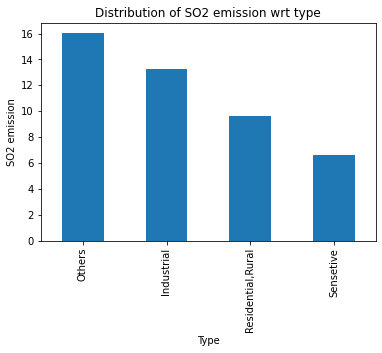

In [ ]:
so2_type_groupby = data.groupby([data['type']])['so2'].mean().sort_values(ascending = False)
so2_type_groupby.plot.bar()
plt.xlabel('Type')
plt.ylabel('SO2 emission')
plt.title('Distribution of SO2 emission wrt type')
plt.show()

TakeAway: /
So2 emission is major in cases from industrial areas, rather than residential or rural; It seems that type 'others' have major emission, but still its categoty form from missing values in dataset, which could lie in any of the tree major type categories. So We consider higher emission from Industrial type areas.

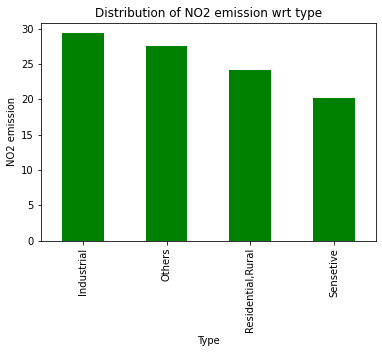

In [ ]:
so2_type_groupby = data.groupby([data['type']])['no2'].mean().sort_values(ascending = False)
so2_type_groupby.plot.bar(color = 'g')
plt.xlabel('Type')
plt.ylabel('NO2 emission')
plt.title('Distribution of NO2 emission wrt type')
plt.show()

TakeAway: /
Obviously, No2 emission is major in cases from industrial areas, as mostly the manufacturing factories of various goods emits most of the harmful gases.

#### SO2,NO2 and rspm emissions trends over the years

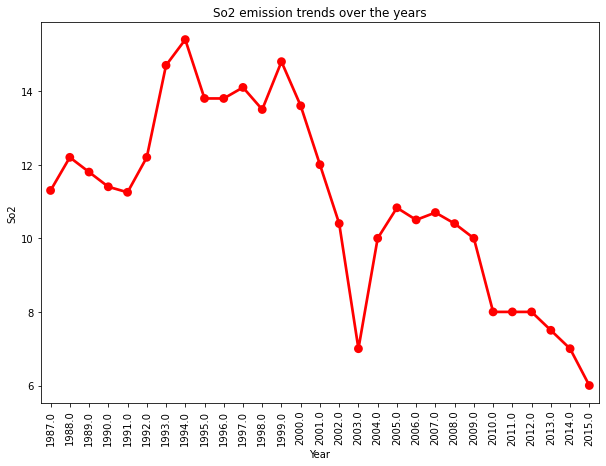

In [ ]:
year_groupby = data.groupby(['year']).median().reset_index().sort_values(by = 'year', ascending = False)

# SO2
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'year', y = 'so2', data = year_groupby, color= 'r')
plt.xlabel('Year')
plt.ylabel('So2')
plt.title('So2 emission trends over the years')
plt.show()

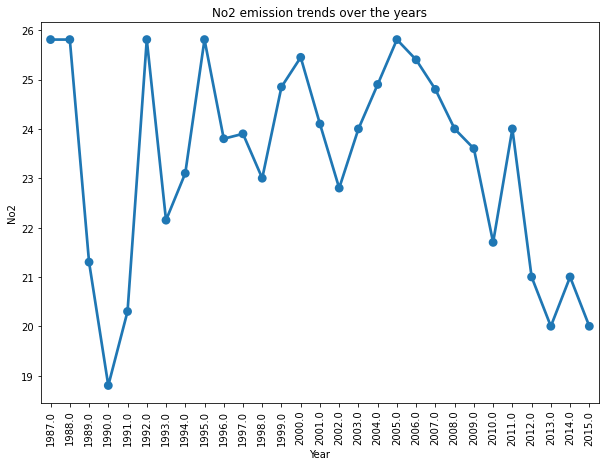

In [ ]:
# No2
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'year', y = 'no2', data = year_groupby)
plt.xlabel('Year')
plt.ylabel('No2')
plt.title('No2 emission trends over the years')
plt.show()

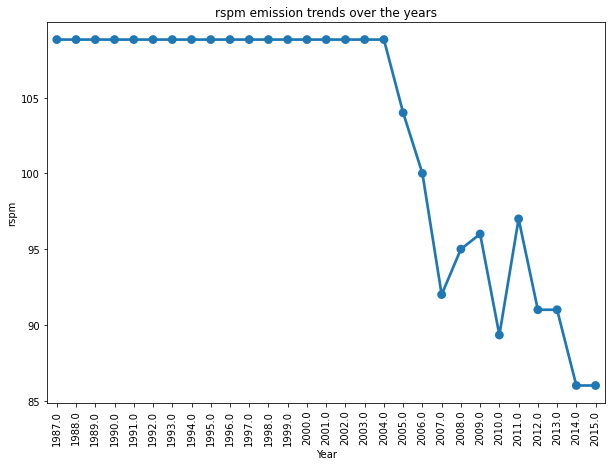

In [ ]:
#rspm 
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'year', y = 'rspm', data = year_groupby)
plt.xlabel('Year')
plt.ylabel('rspm')
plt.title('rspm emission trends over the years')
plt.show()

TakeAway:
- **SO2** - In 1990 - 2000, in these decade, So2 emission is at peak. But after 2000, over the years, due to various governments acts in progression for reducing the amount of so2 emitted, it comes under control. /
- **rspm** - In these also, emission of rspm is very large in amount, but after 2005, it shows its decreasing slope. /
- **NO2** - But in case of No2, emission descreasing slope follows after 2010, before that it shows similar behaviour (if we take mean from 1987 - 2010) over the years.

#### Statewise Emission trends

In [ ]:
state_groupby = data.groupby(['state']).mean().reset_index()

[Text(0, 0, 'Andhra Pradesh'),
 Text(0, 0, 'Arunachal Pradesh'),
 Text(0, 0, 'Assam'),
 Text(0, 0, 'Bihar'),
 Text(0, 0, 'Chandigarh'),
 Text(0, 0, 'Chhattisgarh'),
 Text(0, 0, 'Dadra & Nagar Haveli'),
 Text(0, 0, 'Daman & Diu'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'Gujarat'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Himachal Pradesh'),
 Text(0, 0, 'Jammu & Kashmir'),
 Text(0, 0, 'Jharkhand'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Lakshadweep'),
 Text(0, 0, 'Madhya Pradesh'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Manipur'),
 Text(0, 0, 'Meghalaya'),
 Text(0, 0, 'Mizoram'),
 Text(0, 0, 'Nagaland'),
 Text(0, 0, 'Odisha'),
 Text(0, 0, 'Puducherry'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'Sikkim'),
 Text(0, 0, 'Tamil Nadu'),
 Text(0, 0, 'Telangana'),
 Text(0, 0, 'Tripura'),
 Text(0, 0, 'Uttar Pradesh'),
 Text(0, 0, 'Uttarakhand'),
 Text(0, 0, 'Uttaranchal'),
 Text(0, 0, 'West Bengal'),
 Text(0, 0, 'andaman-and-nicobar-islands'

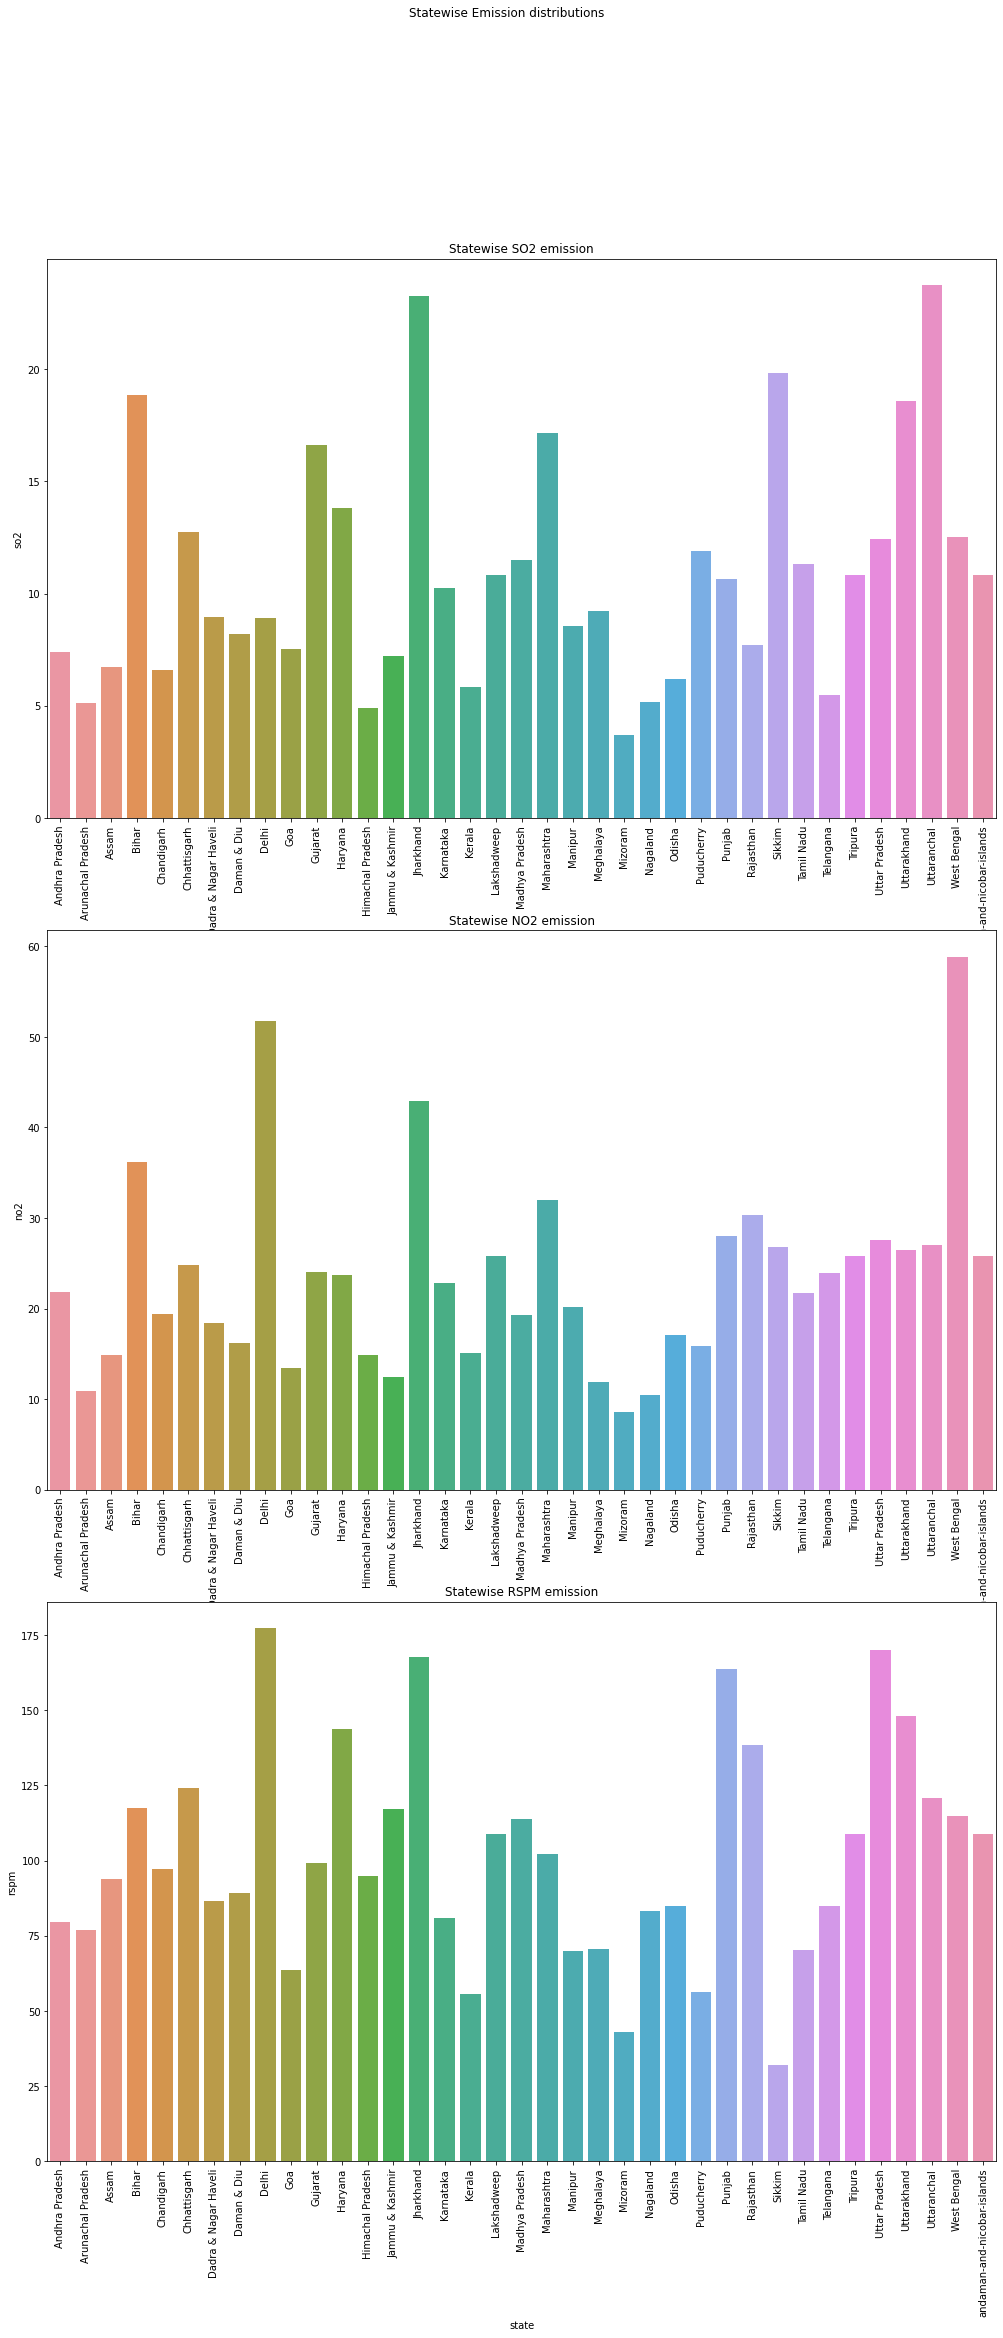

In [ ]:
fig, axes = plt.subplots(3,1, figsize =(17, 35))
fig.suptitle('Statewise Emission distributions')
#SO2
sns.barplot(ax = axes[0], x = 'state', y = 'so2', data = state_groupby)
axes[0].set_title('Statewise SO2 emission')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)
#NO2
sns.barplot(ax = axes[1], x = 'state', y = 'no2', data = state_groupby)
axes[1].set_title('Statewise NO2 emission')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)
#RSPM
sns.barplot(ax = axes[2], x = 'state', y = 'rspm', data = state_groupby)
axes[2].set_title('Statewise RSPM emission')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 90)

#### Top 10 States in emission So2

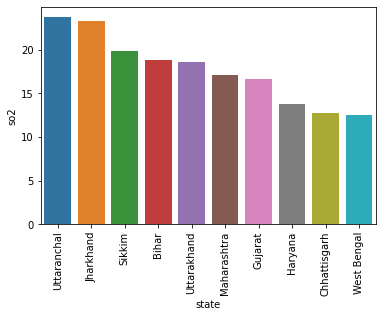

In [ ]:
so2_emission_top_states = state_groupby.sort_values(by= 'so2', ascending= False)
so2_emission_top_states = so2_emission_top_states[['state', 'so2']].head(10)
sns.barplot(x= 'state', y = 'so2', data = so2_emission_top_states)
plt.xticks(rotation = 90)
plt.show()

#### Top 10 States in emission of No2

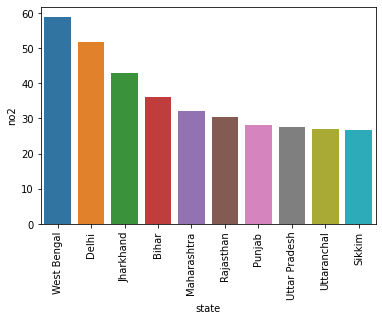

In [ ]:
no2_emission_top_states = state_groupby.sort_values(by= 'no2', ascending= False)
no2_emission_top_states = no2_emission_top_states[['state', 'no2']].head(10)
sns.barplot(x= 'state', y = 'no2', data = no2_emission_top_states)
plt.xticks(rotation = 90)
plt.show()

#### Top 10 states in rspm emission

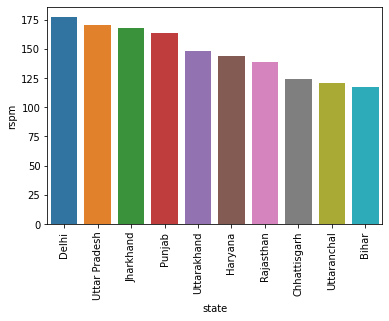

In [ ]:
rspm_emission_top_states = state_groupby.sort_values(by= 'rspm', ascending= False)
rspm_emission_top_states = rspm_emission_top_states[['state', 'rspm']].head(10)
sns.barplot(x= 'state', y = 'rspm', data = rspm_emission_top_states)
plt.xticks(rotation = 90)
plt.show()

TakeAway: **So2 emission** - Top 3 States are **Uttaranchal, Jharkhand and Sikkim.** ////
**No2 emission** - Top 3 states are **West bangal, Delhi and Jharkhand.**////
**rspm emission** - Top 3 States are **Delhi, Uttar Pradesh and Jharkhnad.**////
Seems That, If we consider **all togather states involvement, Delhi and Jharkhand are at the peak,** in production of all three of the deadly gas emissions.

#### Top Cities giving combined highest so2+no2 emission

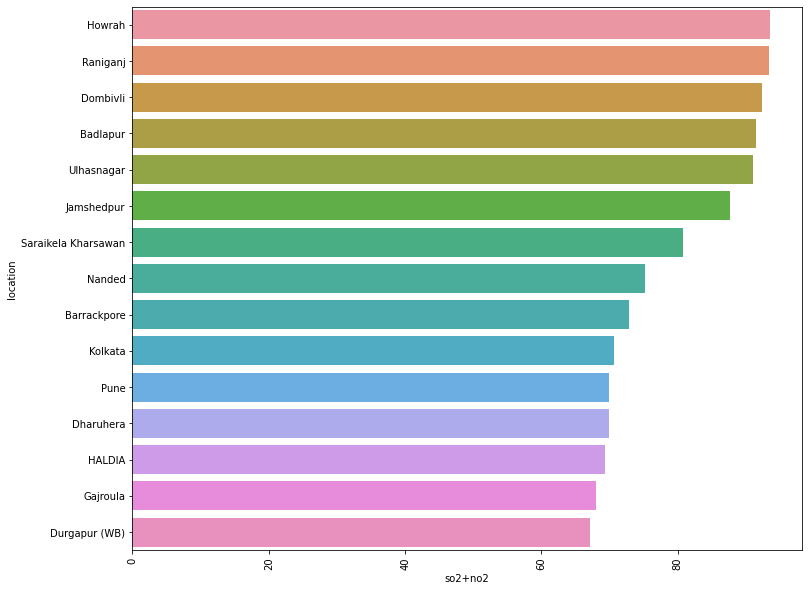

In [ ]:
fig, axes = plt.subplots(1,1, figsize =(12, 10))
data['so2+no2'] = data['so2'].values + data['no2'].values
location_groupby = data.groupby(['location']).mean().reset_index()
top_cities = location_groupby.sort_values(ascending = False, by = 'so2+no2')
top_cities = top_cities[['location', 'so2+no2']].head(15)
sns.barplot(ax = axes, x= 'so2+no2', y = 'location', data = top_cities, orient= 'h')
plt.xticks(rotation = 90)
plt.show()

Above Graphs gives top 15 locations/cities in India that produces major amount of deadly gases as mentioned - So2, No2 and rspm. Most of the emission of these gases are produced as the byproduct of Industries, Factories or Various Manufacturing Plants.i.e It majorly comes from Industrial sectors.

In [ ]:
### Save the cleaned dataframe as csv file.

data.to_csv('Indian_airquality_cleaned.csv', index= False)

In [ ]:
#### Save in excel format also
data.to_excel('Indian_airquality_cleaned.xlsx', index = False)